In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


In [84]:
L=60
filename1 = '/Users/julianthoenniss/Documents/PhD/data/ent_entropy_Jx=0.31_Jy=0.0_g=0.7853981633974483_del_t=1_beta=1.0_L=' + str(60)

#filename1 = '/Users/julianthoenniss/Documents/PhD/data/ent_entropy_Jx=0.7853981633974483_Jy=0.0_g=0.7853981633974483_del_t=1_beta=1.0_L=' + str(60)

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    print('maximal iterator:',len(data_entr[:])-1)

maximal iterator: 18


In [85]:
iterator = 13
times = []
time_step = 0
with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    times = data_entr[:,0]
    time_step = int(times[iterator])

max_time = int(max(times))
print('time step:', time_step)
print('maximal time:', max_time)

time step: 41
maximal time: 41


In [86]:
A_inv = np.zeros((2*(4*time_step-1)*L,2*(4*time_step-1)*L), dtype=np.complex_)

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_bulk_corr = f['bulk_corr']
    
    A_inv[:,:] = data_bulk_corr[iterator,:2*(4*time_step-1)*L,:2*(4*time_step-1)*L]


No handles with labels found to put in legend.


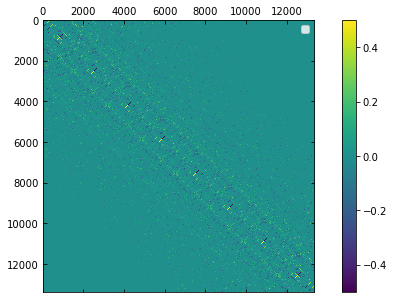

In [61]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

im = ax.matshow(np.real(A_inv))
fig.colorbar( im, orientation='vertical')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

(19560, 19560)


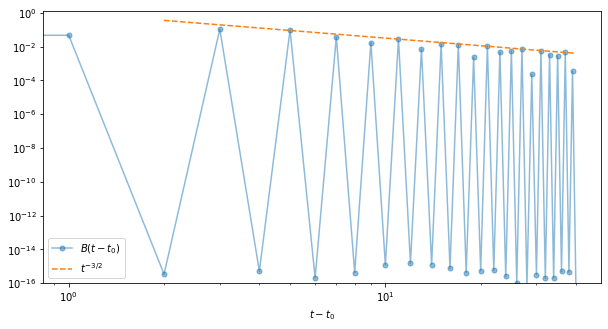

In [94]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

ax.set_xlabel(r'$t-t_0$')
#ax.set_ylabel(r'$B(t-t_0)$')
print(A_inv.shape)
corr= []
for tau in range ((4*time_step-2), -1, -4):
    corr.append(abs(A_inv[tau,(4*time_step-2)]))
    
ax.set_ylim([1.e-16,1.2])

ax.set_xscale('log')
ax.set_yscale('log')
    
ax.plot( np.arange(len(corr)), zero_to_nan(np.real(corr)), label=r'$B(t-t_0)$', marker='o', alpha=.5, ms=5)
ax.plot(np.arange(2,len(corr)), 1 * np.arange(2,len(corr), dtype=float)**(-1.5), '--',label= r'$t^{-3/2}$')

ax.legend(loc="lower left")